## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor , GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv(r"C:\CODE\40-MLProject\notebook\data\stud.csv")

#### Show Top 5 Records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y variables

In [4]:
X = df.drop(columns=['math_score'],axis=1)

In [5]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [7]:
y = df['math_score']

In [8]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [9]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    [
        ("cat", OneHotEncoder(drop = 'first' , handle_unknown = 'ignore') , cat_features),
         ("num", StandardScaler(), num_features)        
    ]
)

In [10]:
X.shape

(1000, 7)

In [11]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 7), (200, 7))

#### Create an Evaluate Function to give all metrics after model Training

In [15]:
pipelines = {
    'Linear Regression' : Pipeline([
        ('preprocessor' , preprocessor) , 
        ('model' , LinearRegression())
    ]) , 
    
    'SVR' : Pipeline([
        ('preprocessor' , preprocessor) , 
        ('model' , SVR())
    ]) ,
    
    'RandomForestRegressor' : Pipeline([
        ('preprocessor' , preprocessor) , 
        ('model' , RandomForestRegressor())
    ]) , 
    
    'AdaBoost' : Pipeline([
        ('preprocessor' , preprocessor) , 
        ('model' , AdaBoostRegressor())
    ]) ,
    
    'GradientBoostRegressor' : Pipeline([
        ('preprocessor' , preprocessor) , 
        ('model' , GradientBoostingRegressor())
    ]) , 
    
    'XGBoostRegressor' : Pipeline([
        ('preprocessor' , preprocessor) ,
        ('model' , XGBRegressor())
    ]) ,
    
    'CatBoostRegressor' : Pipeline([
        ('preprocessor' , preprocessor) , 
        ('model' , CatBoostRegressor(verbose=0))
    ])
    
}

In [16]:
results = []

for name , pipeline in pipelines.items():
    pipeline.fit(X_train , y_train)
    
    y_train_pred  = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    
    r2 = r2_score(y_test , y_test_pred)
    
    results.append({
        'Model Name' : name , 
        'R2_Score' : r2
    })

results_df = pd.DataFrame(results)

results_df = results_df.sort_values(
    by = 'R2_Score' , 
    ascending = False 
).reset_index(drop = True)

results_df

,Model Name,R2_Score
0,Linear Regression,0.880433
1,GradientBoostRegressor,0.872670
2,RandomForestRegressor,0.852370
3,CatBoostRegressor,0.850263
4,AdaBoost,0.848673
5,XGBoostRegressor,0.825046
6,SVR,0.713544


### Results

## Linear Regression

In [20]:
lin_pipeline = Pipeline([
    ('preprocessor' , preprocessor) , 
    ('model' , LinearRegression())
]) 

lin_pipeline.fit(X_train , y_train) 

y_pred = lin_pipeline.predict(X_test)

score = r2_score(y_test , y_pred)*100
print(f"Accuracy of the model is {score:.2f}")

Accuracy of the model is 88.04


## Plot y_pred and y_test

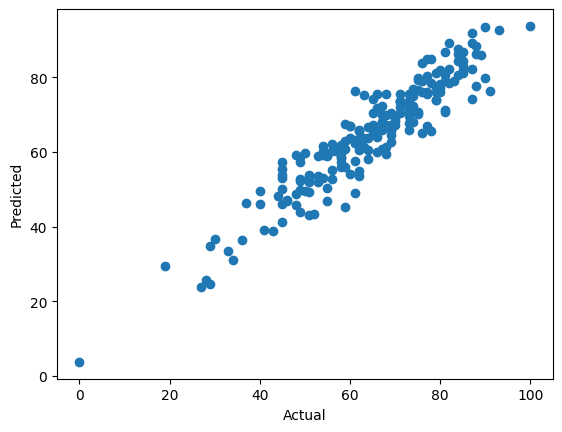

In [21]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

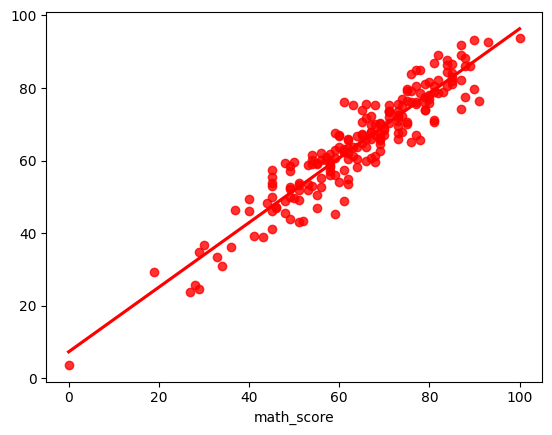

In [22]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [23]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
